In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib notebook
import numpy as np
import word2vec
import re 

from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from numpy import dot
from numpy.linalg import norm
from itertools import chain


C:\Users\arturo.reyeslopez\AppData\Local\Continuum\anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
!pip install spacy

In [3]:
!pip install nltk

In [4]:
!pip install stem

In [5]:
!pip install word2vec

In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer 


nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arturo.reyeslopez\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
def display_closestwords_tsnescatterplot(model, word, size):
    
    arr = np.empty((0,size), dtype='f')
    word_labels = [word]

    close_words = model.similar_by_word(word)

    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [8]:
##Get average sentence vector
def avg_sentence_vector(words, model, num_features, index2word_set):
    #function to average all words vectors in a given paragraph
    featureVec = np.zeros((num_features,), dtype="float32")
    nwords = 0
    for word in words:
        #print('word: ', word)
        #print('words: ', words)
        if any(word in s for s in index2word_set):
            nwords = nwords+1
            featureVec = np.add(featureVec, model[word])

    if nwords>0:
        featureVec = np.divide(featureVec, nwords)
    return featureVec

In [9]:
def change_string(x):
    return x.lower().replace('.', ' ').replace('-',' ').replace("'", ' ').replace('/',' ').replace('&',' ').replace('(','').replace(')','').replace('?','')

In [ ]:
#def change_string(s):
#    return re.sub(r'[^\w\s]','',s).lower()

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arturo.reyeslopez\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
# Filter out stopwords
# Receives tokenized words
def stop_words(word_tokens):
    stop_words = set(stopwords.words('english'))
    return [w for w in word_tokens if not w in stop_words]

In [12]:
#Flatten one level of nesting
def flatten(listOfLists):
    return list(chain.from_iterable(listOfLists))

In [13]:
def stemall(tokens):
    ps = PorterStemmer()
    return flatten([ [ ps.stem(word) for word in line.split(" ")] for line in tokens ])

In [14]:
#Search new words to compare against the dataset are included in the vocabulary. 
#Otherwise, Include them to calculate vectors
def searchVocab(words):
    vocab=[]
    for word in words:
        try:
            word2vec_model[word]
        except:
            vocab.append(word)
        
    return vocab

In [15]:
import word2vec

In [29]:
#list of words
#Clean words:
    #1) Removing characters such as .,-,/, etc
    #2) Lowering case
    #3) Creating tokens
    #4) Deleting stop words
    #5) Stemming tokens
def preprocessing(words):    
    #1,2,3,4
    tokens= list(map(stop_words,list(map(nltk.word_tokenize, list(map(lambda x: change_string(x), words))))))
    #print(tokens)
    #5
    ps = PorterStemmer()
    return list(map(lambda x: [ps.stem(y) for y in x], tokens))

In [30]:
#Read dataset:
def readFileToDataFrame(fileName):
    return pd.read_csv(fileName, usecols = ['name'])


In [33]:
#Process dataset sent as dataframe:
def preprocess(df):
    words=[]
    words= df['name'].values.tolist()

    prepWords= preprocessing(words)

    data_transposed = zip(prepWords)
    df2 = pd.DataFrame(data_transposed, columns=["Name"])
    
    return prepWords, df2

In [34]:
def trainModel(prepWords):
    #Training model using preprocessed data
    word2vec_model = Word2Vec(prepWords,size=100, window=1, min_count=1, workers=7)

    #Saving the model
    #word2vec_model.save("word-similarities-model-word2vec.model")

    #summarize the loaded model
    #print(word2vec_model)

    #Summarize vocabulary
    #words = list(word2vec_model.wv.vocab)
    #print(words)
    return word2vec_model

In [39]:
df= readFileToDataFrame('name-submission-sample.csv')
prepWords, df2= preprocess(df)
print(prepWords)
word2vec_model= trainModel(prepWords)
#Calculating average vector for each company name:
df['avg_vector']=df2['Name'].apply(lambda row : avg_sentence_vector(row, model=word2vec_model, num_features=100, index2word_set=set(word2vec_model.wv.index2word)).tolist())

#Saving name and vector values in file
df.to_csv('name-submission-vectors.csv',encoding='utf-8', index=False)

[['r', 'f', 'n', 'contract'], ['splash', 'beauti', 'studio', 'ltd'], ['fabl', 'clean', 'co'], ['mainland', 'tank', 'servic'], ['harrison', 'develop', 'corpor'], ['strate', 'scape'], ['tight', 'line', 'fish', 'charter'], ['westwat', 'develop', 'ltd'], ['thechimneyguy', 'chimney', 'servic'], ['2008', 'enterpris', 'ltd'], ['cottonwood', 'tree', 'emporium'], ['westform', 'enterpris', 'ltd'], ['kevin', 'mitchel', 'construct', 'inc'], ['interior', 'drywood', 'initi'], ['elips', 'consult', 'servic'], ['coal', 'valley', 'metal', 'recycl'], ['greenwood', 'gourmet', 'mushroom', 'greenwood', 'b', 'c'], ['blacklin', 'form', 'ltd'], ['chida', 'technolog'], ['ward', 'group', 'health', 'system', 'strategi'], ['okonlin', 'info', 'softwar'], ['l', 'dare', 'compani', 'ltd'], ['r', 'z', 'excav', 'log'], ['dj', 'product'], ['sabiston', 'builder', 'ltd'], ['uniqu', 'integr', 'well', 'inc'], ['ladner', 'storag', 'ltd'], ['real', 'time', 'graphic'], ['wrap', 'insul', 'ltd'], ['real', 'time', 'market', 'inc']

C:\Users\arturo.reyeslopez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [62]:
#Access vector for one word
print(word2vec_model['biochemic'])

C:\Users\arturo.reyeslopez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


KeyError: "word 'biochemic' not in vocabulary"

In [59]:
from scipy import spatial
from gensim.models import KeyedVectors

#ORIGINAL 4 PAWS ONLY PET SERVICE
#get average vector for a new company
#company = "SMOKERY-FLURER" #1.0
company = "PAWS 4 PET SERVICE" #Google:0.95, Word2Vec model:  1.0
#company = "PAWS FOR ONLY PET" #0.80 0.77193
#company = "PAWS FOR ONLY PETS" #0.80 0.77193  
#company = "POS FOR PET" POS is not in the vocabulary
#company ="VICTORIA INSTITUTE BIOCHEMICAL"


company_clean=change_string(company)
tokens = nltk.word_tokenize(company_clean)
sw = stop_words(tokens)

ps = PorterStemmer()
stemmized_toks= stemall(sw)

#Before query words in vocabulary and returns the words needed to be included in the vocabulary
vocab= searchVocab(stemmized_toks)


#If needed add word to vocabulary
if vocab:
    df= readFileToDataFrame('name-submission-sample.csv')
    prepWords, df2= preprocess(df)
    prepWords.append(vocab)
    #print(prepWords)
    word2vec_model= trainModel(prepWords)
    
    #Calculating average vector for each company name:
    df['avg_vector']=df2['Name'].apply(lambda row : avg_sentence_vector(row, model=word2vec_model, num_features=100, index2word_set=set(word2vec_model.wv.index2word)).tolist())

    #Saving name and vector values in file
    df.to_csv('name-submission-vectors-new-copy.csv',encoding='utf-8', index=False)

else:
    df = pd.read_csv('name-submission-vectors.csv', usecols = ['name','avg_vector'])
    df['avg_vector']=df['avg_vector'].apply(lambda s: [float(x.strip(' []')) for x in s.split(',')])


company_avg_vector = avg_sentence_vector(stemmized_toks, model=word2vec_model, num_features=100, index2word_set=set(word2vec_model.wv.index2word)).tolist()

print(company_avg_vector)

df['similarity']=df['avg_vector'].apply(lambda row : 1 - spatial.distance.cosine(row, company_avg_vector))

s= df['similarity'].max()
print(s)

df3= df.loc[df['similarity']== s]
print(df3)
print("The maximum similarity of the word ",company, ':', s ,'which corresponds to row: ',df3['name'])


C:\Users\arturo.reyeslopez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


[-0.0013231642078608274, 0.0030889848712831736, -0.0014054635539650917, -0.00024287228006869555, -0.0021357920486479998, -0.0006559801986441016, -0.0026137137319892645, 0.00011200289009138942, -0.0024681901559233665, 0.0008465498685836792, 0.0005525830201804638, 0.0014490268658846617, 0.0009055951377376914, 0.0020252750255167484, -0.001425019814632833, -0.002233448438346386, 0.0019139398355036974, 0.0010246250312775373, 0.001411819364875555, -0.003511532209813595, 0.0019020868930965662, -0.00019248778698965907, -0.0034384175669401884, -0.00379767338745296, 0.000564785092137754, -0.0008989892667159438, -0.00031625316478312016, -0.001717897830531001, 0.00011367961997166276, 0.0017516083316877484, 0.0017756626475602388, 0.0016877192538231611, 0.0017469057347625494, 0.0007926395628601313, 0.0008093771175481379, -0.0002505035372450948, -0.003996922634541988, 0.0005475729703903198, -0.0011746102245524526, -0.0008450921741314232, -0.0026727973017841578, 0.0017723350320011377, -0.0005180029547

C:\Users\arturo.reyeslopez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()


In [63]:
words = list(word2vec_model.wv.vocab)
print(words)

['r', 'f', 'n', 'contract', 'splash', 'beauti', 'studio', 'ltd', 'fabl', 'clean', 'co', 'mainland', 'tank', 'servic', 'harrison', 'develop', 'corpor', 'strate', 'scape', 'tight', 'line', 'fish', 'charter', 'westwat', 'thechimneyguy', 'chimney', '2008', 'enterpris', 'cottonwood', 'tree', 'emporium', 'westform', 'kevin', 'mitchel', 'construct', 'inc', 'interior', 'drywood', 'initi', 'elips', 'consult', 'coal', 'valley', 'metal', 'recycl', 'greenwood', 'gourmet', 'mushroom', 'b', 'c', 'blacklin', 'form', 'chida', 'technolog', 'ward', 'group', 'health', 'system', 'strategi', 'okonlin', 'info', 'softwar', 'l', 'dare', 'compani', 'z', 'excav', 'log', 'dj', 'product', 'sabiston', 'builder', 'uniqu', 'integr', 'well', 'ladner', 'storag', 'real', 'time', 'graphic', 'wrap', 'insul', 'market', 'mc', 'mainten', 'new', 'view', 'yaskar', 'sea', 'marin', 'electr', 'octan', 'help', 'hand', 'senior', 'care', 'mediar', 'dvd', 'canada', 'camprv', 'rental', 'alemb', 'heal', 'art', 'centr', 'et', 'transpor

In [67]:
print (word2vec_model.similarity('bio', 'biochem'))

-0.019920438064118307


C:\Users\arturo.reyeslopez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


In [70]:
print (word2vec_model.most_similar(positive=['biochem'], negative=[], topn=4))

[('loren', 0.35048943758010864), ('upland', 0.3484687805175781), ('spirogyra', 0.3171609044075012), ('handz', 0.2979101538658142)]


C:\Users\arturo.reyeslopez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


C:\Users\arturo.reyeslopez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  
C:\Users\arturo.reyeslopez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  
C:\Users\arturo.reyeslopez\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


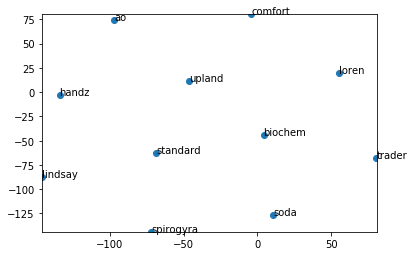

In [69]:
display_closestwords_tsnescatterplot(word2vec_model, 'biochem', 100)
